In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


## import the csv file and read it

In [78]:
df=pd.read_csv('data/stud.csv')

In [79]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


# Preparing x and y-

In [80]:
x=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

creating columns transformation with 3 types of transformationa

In [81]:
num_features=x.select_dtypes(include=['int64','float64']).columns
cat_features=x.select_dtypes(include=['object']).columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
# creating columns transformation with 
preprocessor = ColumnTransformer(
    [
        ('standredscal', numeric_transformer, num_features),
        ('onehot', oh_transformer, cat_features)
    ]
)

In [82]:
x=preprocessor.fit_transform(x)

In [83]:
x.shape

(1000, 19)

## now here split the data into traing and testing purpose

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

creating the evaluate function to give all the metrics after model training

In [85]:
def evaluate_model(true, predicated):
    mae = mean_absolute_error(true, predicated)
    mse = mean_squared_error(true, predicated)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicated)
    return mae, mse, rmse, r2

## now model is going to be made

In [86]:
models={
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "SVR": SVR(),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "CatBoostRegressor": CatBoostRegressor(verbose=False),
    "XGBRegressor": XGBRegressor()
}
## now model is going to be made
models_list=[]
r2_score_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    # make predication
    x_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    # evaluate model on train and test data
    modeel_train_mae, modeel_train_mse, modeel_train_rmse, modeel_train_r2 = evaluate_model(y_train, x_train_pred)
    modeel_test_mae, modeel_test_mse, modeel_test_rmse, modeel_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])

    print("model performance on training data")
    print("MSE:", round(modeel_train_mse,2))
    print("RMSE:", round(modeel_train_rmse,2))
    print("R2_Score:", round(modeel_train_r2,2))
    print("\n")
    print("--------------------------------------------------------------------------")
    print("model performance on testing data")
    print("MSE:", round(modeel_test_mse,2))
    print("RMSE:", round(modeel_test_rmse,2))
    print("R2_Score:", round(modeel_test_r2,2))
    r2_score_list.append(round(modeel_test_r2,2))
    print("===========================================================================")
    print("\n")
    




KNeighborsRegressor
model performance on training data
MSE: 32.64
RMSE: 5.71
R2_Score: 0.86


--------------------------------------------------------------------------
model performance on testing data
MSE: 52.62
RMSE: 7.25
R2_Score: 0.78


DecisionTreeRegressor
model performance on training data
MSE: 0.08
RMSE: 0.28
R2_Score: 1.0


--------------------------------------------------------------------------
model performance on testing data
MSE: 60.41
RMSE: 7.77
R2_Score: 0.75


RandomForestRegressor
model performance on training data
MSE: 5.27
RMSE: 2.3
R2_Score: 0.98


--------------------------------------------------------------------------
model performance on testing data
MSE: 36.14
RMSE: 6.01
R2_Score: 0.85


SVR
model performance on training data
MSE: 43.26
RMSE: 6.58
R2_Score: 0.81


--------------------------------------------------------------------------
model performance on testing data
MSE: 66.04
RMSE: 8.13
R2_Score: 0.73


LinearRegression
model performance on training d

## RESULT

In [87]:
pd.DataFrame(
    list(zip(models_list, r2_score_list)),
    columns=["model_name", "r2_score"]
).sort_values(by="r2_score", ascending=False)


,model_name,r2_score
4,LinearRegression,0.88
5,Ridge,0.88
7,CatBoostRegressor,0.85
2,RandomForestRegressor,0.85
6,Lasso,0.83
8,XGBRegressor,0.82
0,KNeighborsRegressor,0.78
1,DecisionTreeRegressor,0.75
3,SVR,0.73


## here we can see LinearRegression model is giveing good result so we will use it

In [89]:
lin_model=LinearRegression(fit_intercept=True)
lin_model.fit(x_train, y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test, y_pred)*100
print(f'accuracy of the model is:  {round(score,2)}')

accuracy of the model is:  88.04


Text(0.5, 1.0, 'Actual vs Predicted Values')

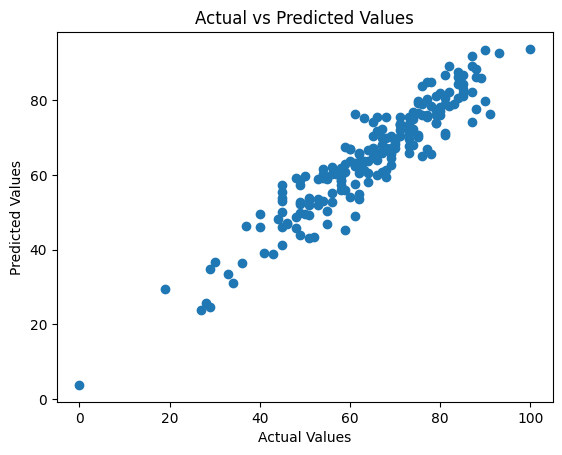

In [91]:
plt.scatter(y_test, y_pred,colorizer='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

<Axes: xlabel='math_score'>

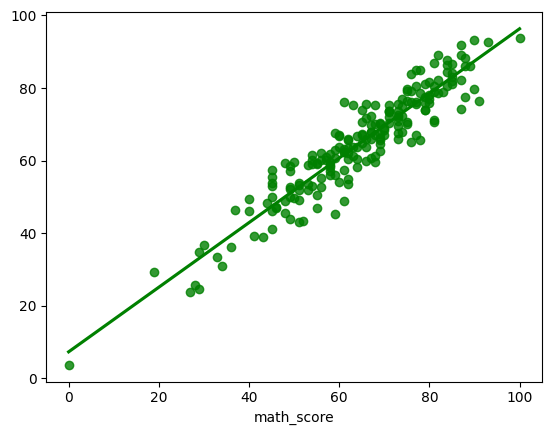

In [94]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="green")

difference between actual and predicted--

In [97]:
df_prd=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_prd['Difference'] = df['Actual'] - df['Predicted']

In [99]:
df_prd

,Actual,Predicted,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
